# Linear Regression
*common way to measure associations between a dependent/measured/random variable (Y) and a set of independent predictors (X)*

## Definitions
* **simple linear regression**: uses one predictor
* **multiple linear regression**: uses multiple predictors
* **general linear model**: allow Y to be a vector

## Linear regression uses
1) hypothesis testing (inferring if Y is associated with X) --> gives a p-value
2) determine the strength of an association between X and Y
    * (+) beta-weight = positive relationship
    * (-) beta-weight = negative relationship
3) use the model to predict unknown values

* to compare beta-weights from two different regressions, you perform a standardized linear regression
    * used same linear model, applied to standardized variables
    * X and Y are converted into z-scores to standardize

## calculating slope and y-intercept of a regression line


## Ho for linear regression
either:
1) b = 0
    * analysis of variance & F-stat used to support/reject null
2) b = bo
    * t-test used to support/reject null

## Neuroscience Examples
### London Taxi Drivers
**is a linear regression a proper way to analyze this data?**
    * the data don't really look linear. 50-250 mo (most of the points) look pretty flat... There are really only two data points ~350 mo that give the regression a modest slope
**Can one make any sort of inference about casualty from this finding? What are the weaknesses and strengths of such a study and set of findings?**
    * no causality here, because they are simply looking at associations. This is not a controlled experiment where they are manipulating a variable and controlling all possible confounds.
    * weaknessess: small sample size, lack of normal controls
    * strenghts: bus driver comparison

### Musical Brains
**What do you think of their n?**
* n=13 / 11 / 9 for control / relative / perfect
* pretty small n

**How strong of a claim do you think they can make with their regression based on their n?**
* not strong claims... also, I wanna see indv data points for each n (i don't understand what they're plotting... the average activity across all participants in the group for that note?)

**What would their confidence intervals look like?**
* confidence intervals would be pretty big (as in long vertical bars), not very high confidence

**In each plot, there are 2 regression lines. In theory, can you think of a way to decide if the two regression lines are the same or not? What would be your Ho?**
* you could standardize the two linear regressions (convert into z-scores) and compare
* not sure what Ho would be in their case... I guess that there is no difference between the pure tone and the piano tone? (or is this question asking for the Ho of the whole experiment? Which, in that case, I assume their null hypothesis would be that tones are not represented differently in the neural activity of musicians compared with controls)

**Ignoring the two types of musicians, what is the take-home message from the graph?**
* well from the figure legend's title, they take-home message form the graph is that the younger the musicians began practising, the stronger the cortical activation for piano tones

**Is it ok to treat both sets of musicians as one group? What assumptions would you have to make?**
* if you treat both sets of musicians as one group, you would need to assume that in each group/sample, the distribution/variability/st. dev is the same

**What tests do you think you should do(qualitatively speaking)?**
* non-parametric unpaired two sample test (Mann-Whitney)

**Do you think you should report (if this was your paper] the regression between moment and the two groups separately?**
* between moment?



# Exercises
Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:

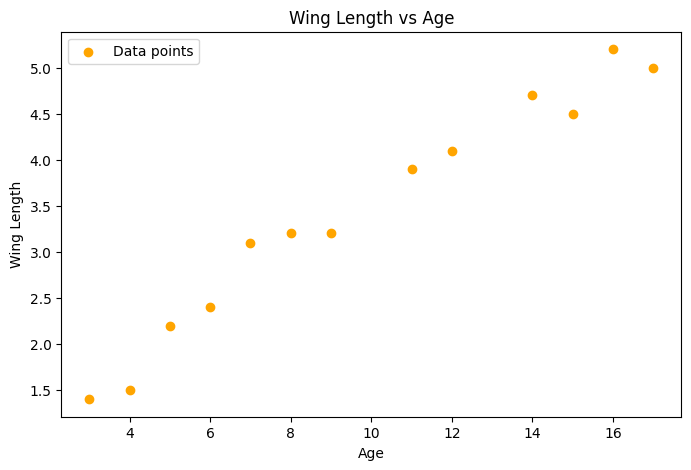

In [18]:
### 1) Plot the relationship between age and wing length

import matplotlib.pyplot as plt

# Data
age = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
wing_length = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

# Create plot
plt.figure(figsize=(8,5))
plt.scatter(age, wing_length, color="orange", label="Data points")
# plt.plot(age, wing_length, color="lightblue", linestyle="--")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Wing Length vs Age")
plt.legend()

# Show plot
plt.show()


Regression equation: Wing Length = 0.265 * Age + 0.830
R² = 0.963


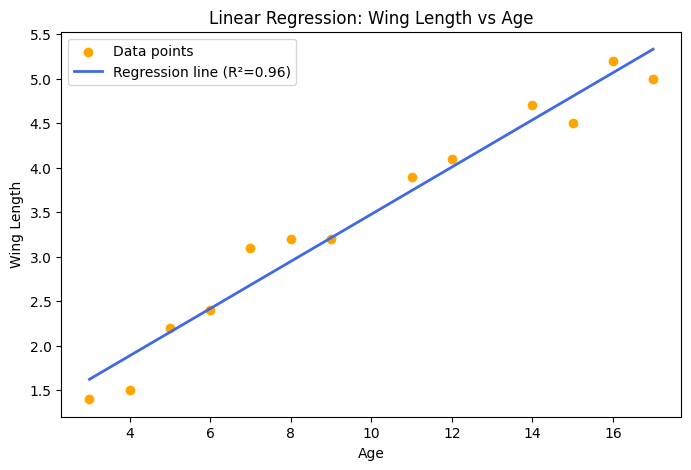

In [19]:
### 2) Calculate and plot the linear regression line

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]).reshape(-1, 1)
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Fit linear regression
model = LinearRegression()
model.fit(age, wing_length)
predicted = model.predict(age)

# Regression parameters
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(age, wing_length)

print(f"Regression equation: Wing Length = {slope:.3f} * Age + {intercept:.3f}")
print(f"R² = {r_squared:.3f}")

# Plot
plt.figure(figsize=(8,5))
plt.scatter(age, wing_length, color="orange", label="Data points")
plt.plot(age, predicted, color="royalblue", linewidth=2, label=f"Regression line (R²={r_squared:.2f})")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Linear Regression: Wing Length vs Age")
plt.legend()

plt.show()


In [ ]:
### 3) Can you reject the null hypothesis that b = 0?
### 5) Calculate r-squared

import numpy as np
import statsmodels.api as sm

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add constant for intercept
X = sm.add_constant(age)  # adds a column of ones for the intercept
model = sm.OLS(wing_length, X).fit()

# Summary of regression
print(model.summary())
print(f"P-value for slope: {model.pvalues[1]:.4f}")

# Hypothesis testing
if model.pvalues[1] < 0.05:
    print(f"Reject null")
else:
    print(f"Fail to reject null")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           3.01e-09
Time:                        11:34:21   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.168      4.946      0.0

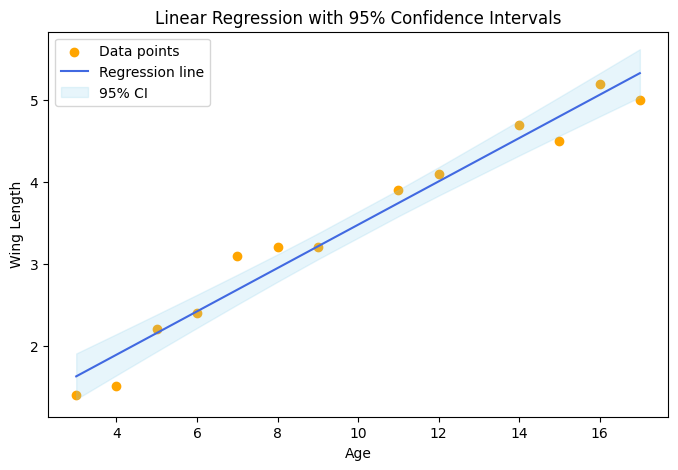

In [ ]:
### 4) Calculate and plot the confidence intervals on the slope of the regression line

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add constant for intercept
X = sm.add_constant(age)
model = sm.OLS(wing_length, X).fit()

# Predictions and confidence intervals
predictions = model.get_prediction(X)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% CI

# Extract values
pred_mean = summary_frame["mean"]
ci_lower = summary_frame["mean_ci_lower"]
ci_upper = summary_frame["mean_ci_upper"]

# Plot
plt.figure(figsize=(8,5))
plt.scatter(age, wing_length, color="orange", label="Data points")
plt.plot(age, pred_mean, color="royalblue", label="Regression line")
plt.fill_between(age, ci_lower, ci_upper, color="skyblue", alpha=0.2, label="95% CI")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Linear Regression with 95% Confidence Intervals")
plt.legend()

plt.show()

In [20]:
### 6) Caclculate the Pearson's *r*

import numpy as np
from scipy.stats import pearsonr

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Calculate Pearson's r
r, p_value = pearsonr(age, wing_length)

print(f"Pearson's r = {r:.3f}")
print(f"p-value = {p_value:.5f}")


Pearson's r = 0.982
p-value = 0.00000


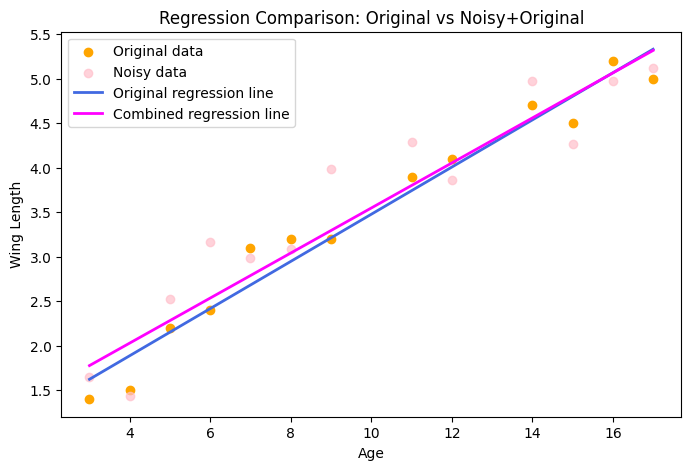

In [23]:
### 7) Add some noise to the data and see how the regression changes

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Original data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add Gaussian noise to wing length
np.random.seed(42)
noise = np.random.normal(0, 0.5, size=wing_length.shape)
wing_length_noisy = wing_length + noise

# Reshape for sklearn
age_reshaped = age.reshape(-1, 1)

# Fit regression for original data
model_original = LinearRegression()
model_original.fit(age_reshaped, wing_length)
pred_original = model_original.predict(age_reshaped)

# Fit regression for combined data (original + noisy)
wing_length_combined = np.concatenate([wing_length, wing_length_noisy])
age_combined = np.concatenate([age, age]).reshape(-1, 1)

model_combined = LinearRegression()
model_combined.fit(age_combined, wing_length_combined)
pred_combined = model_combined.predict(age_reshaped)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(age, wing_length, color="orange", label="Original data")
plt.scatter(age, wing_length_noisy, color="pink", alpha=0.7, label="Noisy data")
plt.plot(age, pred_original, color="royalblue", linewidth=2, label="Original regression line")
plt.plot(age, pred_combined, color="magenta", linewidth=2, label="Combined regression line")

plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Regression Comparison: Original vs Noisy+Original")
plt.legend()
plt.show()



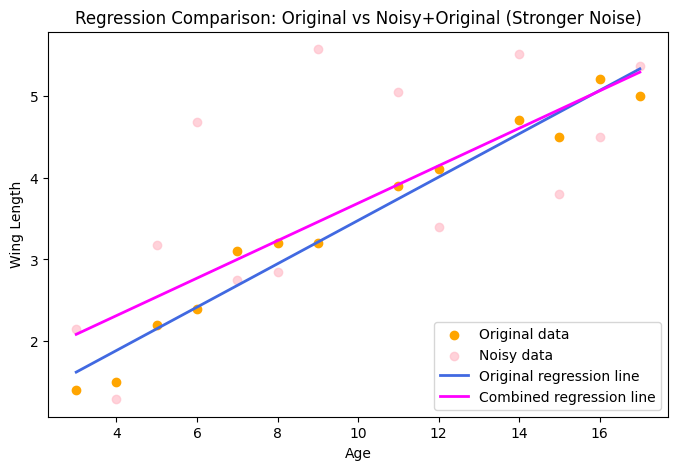

In [25]:
### "Can you make the noise noisier?"

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Original data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add stronger Gaussian noise to wing length
np.random.seed(42)
noise = np.random.normal(0, 1.5, size=wing_length.shape)  # std dev = 1.5 (more noise)
wing_length_noisy = wing_length + noise

# Reshape for sklearn
age_reshaped = age.reshape(-1, 1)

# Fit regression for original data
model_original = LinearRegression()
model_original.fit(age_reshaped, wing_length)
pred_original = model_original.predict(age_reshaped)

# Fit regression for combined data (original + noisy)
wing_length_combined = np.concatenate([wing_length, wing_length_noisy])
age_combined = np.concatenate([age, age]).reshape(-1, 1)

model_combined = LinearRegression()
model_combined.fit(age_combined, wing_length_combined)
pred_combined = model_combined.predict(age_reshaped)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(age, wing_length, color="orange", label="Original data")
plt.scatter(age, wing_length_noisy, color="pink", alpha=0.7, label="Noisy data")
plt.plot(age, pred_original, color="royalblue", linewidth=2, label="Original regression line")
plt.plot(age, pred_combined, color="magenta", linewidth=2, label="Combined regression line")

plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Regression Comparison: Original vs Noisy+Original (Stronger Noise)")
plt.legend()
plt.show()
